##### Name: Mansi Shah
##### NetID: ws2865

##### Using TF hub implement a neural style transfer application. Apply style transfer on 2 different CSU East Bay campus images, using 2 different painting styles.

##### Image 1: concord-campus.jpg

##### Image 2: east-bay-sign.jpg

##### Style 1: japanese_painting.jpg

##### Style 2: Surrealism.jpeg


In [0]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

### Declare the variables that will hold the directory path to images for the content and style.

In [0]:

content_path1 = '/content/concord-campus.jpg'
style_path1 = '/content/japanese_painting.jpg'

content_path2 = '/content/east-bay-sign.jpg'
style_path2 = '/content/Surrealism.jpeg'

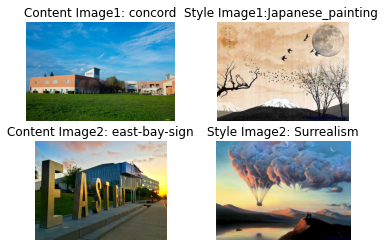

In [9]:
content_image1 = plt.imread(content_path1)
style_image1 = plt.imread(style_path1)

content_image2 = plt.imread(content_path2)
style_image2 = plt.imread(style_path2)

plt.subplot(2, 2, 1)
plt.title('Content Image1: concord')
plt.axis('off')
plt.imshow(content_image1)

plt.subplot(2, 2, 2)
plt.title('Style Image1:Japanese_painting ')
plt.axis('off')
plt.imshow(style_image1)

plt.subplot(2, 2, 3)
plt.title('Content Image2: east-bay-sign')
plt.axis('off')
plt.imshow(content_image2)

plt.subplot(2, 2, 4)
plt.title('Style Image2: Surrealism')
plt.axis('off')
plt.imshow(style_image2)
plt.show()

##### The images are converted into a tensor representation and a function is created that takes in the image path, then converts the images into a tensor using ‘tf.io.read_file’. Then, we change the data types of the values in the tensor to floats between 0 and 1 using ‘tf.image.decode_image’.

In [0]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img

##### to visualize the result from the TensorFlow Hub module, we need to convert the tensor  to an image. For that, we denormalize the tensor that contains values between 0 and 1 to actual pixel values by multiplying each element by 255.  An array is then created using Numpy that includes the appropriate data type we require. An image object from the tensor is then returned.

In [0]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)

##### Now, we’ll convert the images to tensor and pass them to a module using ‘.load()’ the method from the TensorFlow Hub package.We want a combined result of the style and content from our input image; therefore, we will create a variable to hold the result of the operation from the module.To visualize the result, we will use the ‘tensor_to_image’ function created above.

In [0]:
content_image_tensor1 = image_to_tensor(content_path1)
style_image_tensor1 = image_to_tensor(style_path1)

content_image_tensor2 = image_to_tensor(content_path2)
style_image_tensor2 = image_to_tensor(style_path2)

### First output image

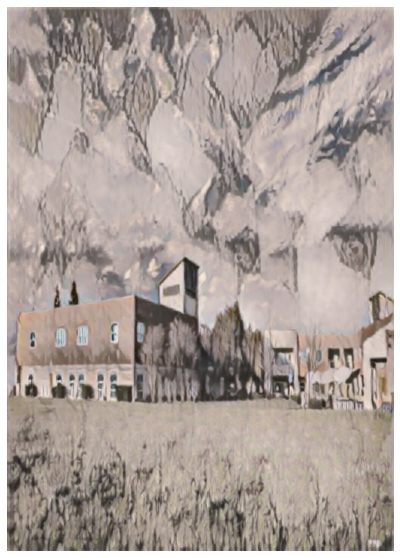

In [16]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
combined_result = hub_module(tf.constant(content_image_tensor1), tf.constant(style_image_tensor1))[0]
tensor_to_image(combined_result)

### Second output image

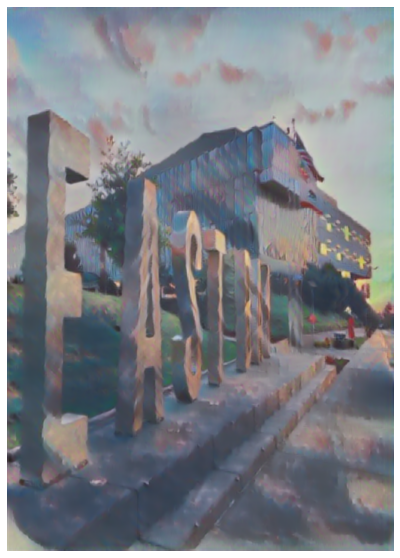

In [17]:
#hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
combined_result = hub_module(tf.constant(content_image_tensor2), tf.constant(style_image_tensor2))[0]
tensor_to_image(combined_result)

#### Conclusion: 
Neural Style Transfer is a technique that utilizes deep convolutional neural network and algorithms to extract the content information from an image and the style information from another reference image. After the extraction of style and content, a combination image is generated where the content and style of the resulting image is sourced from different images.

Output images are generated by combining style and content using two reference images.